In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
from tqdm import tqdm
import matplotlib.colors as colors

#
converter = colors.ColorConverter()

os.makedirs("results/hea",exist_ok=True)

sys.path[0] = "/home/cooper-cooper/Desktop/vans/"
#plt.style.use("results/plots/style.mplstyle")
from utilities.variational import VQE
from utilities.circuit_basics import *
from utilities.evaluator import Evaluator
matplotlib.rc("text",usetex=True)
plt.rcParams["font.family"] = "Times New Roman"
axinticks=[]

#ground = np.genfromtxt('results/TFIM/TFIM8.csv',delimiter=',')
#energies = np.load("results/TFIM/energiesTFIM8.npy")
#js,ans = ground[:,0], ground[:,1]
#relatives=np.abs((energies-ans)/ans)


In [7]:
os.chdir("/home/cooper-cooper/Desktop/vans/")

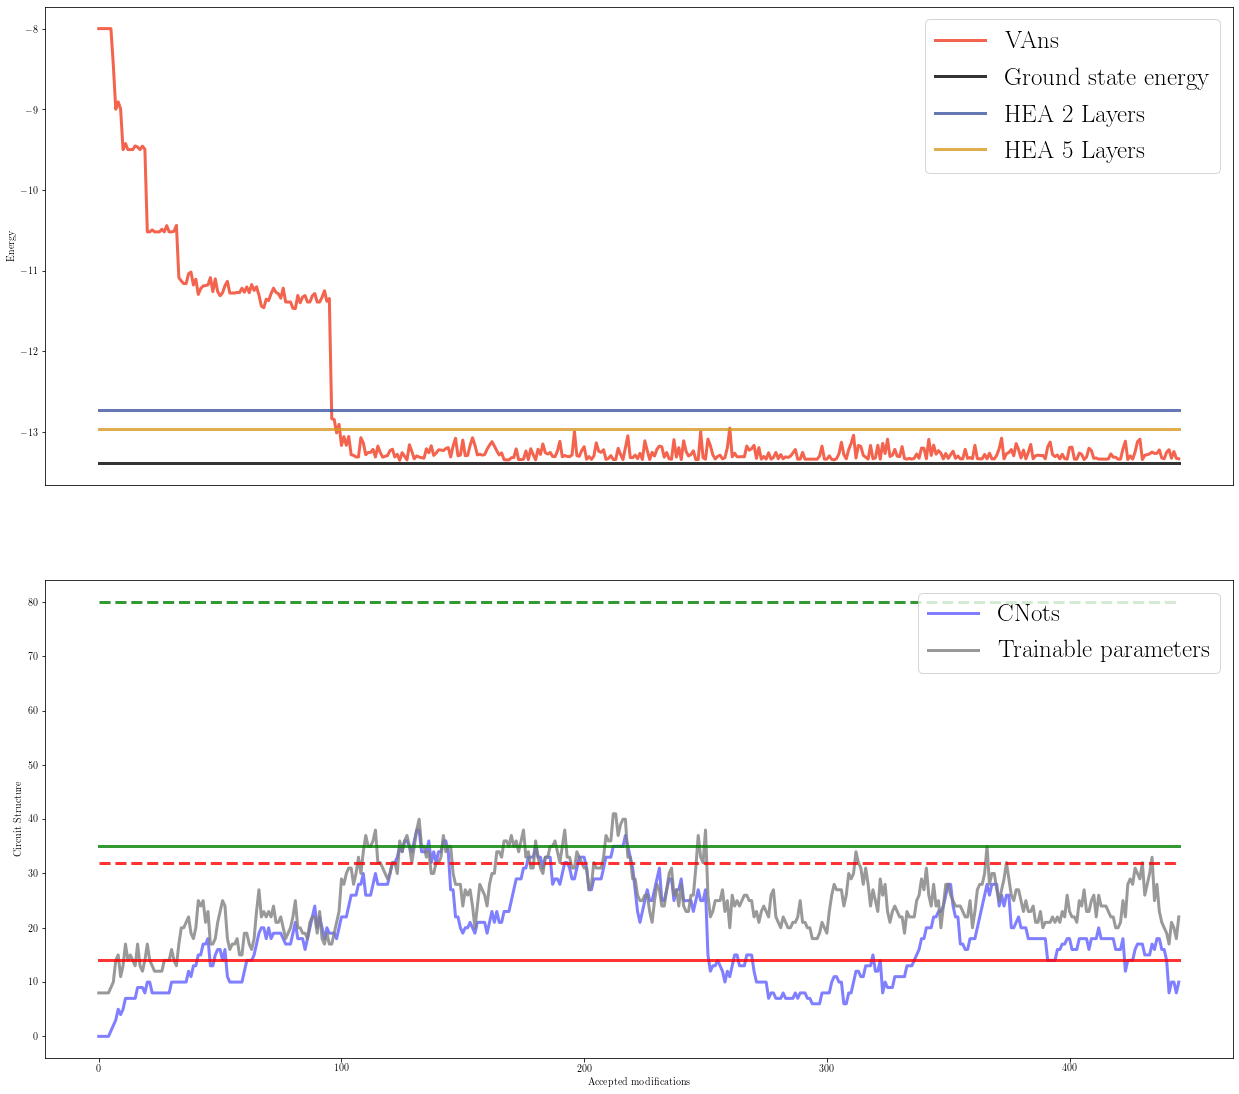

In [19]:
marco_hea_2=0.6549782647945612
marco_hea_5=0.42458460441807233

energies = []
J=5.0
#args={"n_qubits":8,"problem_config":{"problem" : "XXZ", "g":1.0, "J": J}, "load_displaying":False, "specific_folder_name":"8Q - J {} g 1.0".format(J)}
#args={"n_qubits":8,"problem_config":{"problem" : "XXZ", "g":1.0, "J": J}, "load_displaying":False, "specific_folder_name":"8Q - J {} g 1.0".format(J)}
bond=1.46
problem_config_load={"problem" : "H2", "geometry": str([('H', (0., 0., 0.)), ('H', (0., 0., bond))]).replace("\'",""), "multiplicity":1, "charge":0, "basis":"sto-3g"}
problem_config={"problem" : "H2", "geometry": [('H', (0., 0., 0.)), ('H', (0., 0., bond))], "multiplicity":1, "charge":0, "basis":"sto-3g"}

indi=15
J=np.round(np.loadtxt("results/TFIM/datos/8qubits/TFIM8.csv", delimiter=",")[:,0][indi],3)
ground = np.loadtxt("results/TFIM/datos/8qubits/TFIM8.csv", delimiter=",")[:,1][indi]

problem_config={"problem" : "TFIM", "g":1.0, "J": J}
#args={"n_qubits":4,"problem_config":problem_config_load, "load_displaying":False, "specific_folder_name":"4_bd_0.98"}
args ={"n_qubits":8,"problem_config":problem_config,"specific_folder_name":"8Q - J {} g 1.0".format(J)}
vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=problem_config)


evaluator = Evaluator(args,loading=True, path="../data-vans/")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"

nparams=[]
cnots=[]
energies=[]
for index in range(len(list(evaluator.evolution.keys()))):
    index_circuit=evaluator.evolution[index][2]
    cnots.append(vqe_handler.count_cnots(index_circuit))
    nparams.append(vqe_handler.count_params(index_circuit))
    energies.append(evaluator.evolution[index][1])
    
plt.figure(figsize=(20,20))
ax2 = plt.subplot2grid((2,1),(0,0))
ax1 = plt.subplot2grid((2,1),(1,0))

CNOTS2 = vqe_handler.count_cnots(vqe_handler.hea_ansatz_indexed_circuit(L=2))
CNOTS5 = vqe_handler.count_cnots(vqe_handler.hea_ansatz_indexed_circuit(L=5))
PARAMS2 = vqe_handler.count_params(vqe_handler.hea_ansatz_indexed_circuit(L=2))
PARAMS5 = vqe_handler.count_params(vqe_handler.hea_ansatz_indexed_circuit(L=5))

plt.subplots_adjust(bottom=0.15,left=0.075)

ax1.plot(cnots, label="CNots", color="blue",linewidth=3, alpha=0.5)
ax1.plot(nparams, label="Trainable parameters", color="grey",linewidth=3, alpha=0.8)


CNOTS2 = vqe_handler.count_cnots(vqe_handler.hea_ansatz_indexed_circuit(L=2))
CNOTS5 = vqe_handler.count_cnots(vqe_handler.hea_ansatz_indexed_circuit(L=5))
PARAMS2 = vqe_handler.count_params(vqe_handler.hea_ansatz_indexed_circuit(L=2))
PARAMS5 = vqe_handler.count_params(vqe_handler.hea_ansatz_indexed_circuit(L=5))

ax1.plot(np.ones(len(nparams))*CNOTS2, color="red",linewidth=3, alpha=0.8)
ax1.plot(np.ones(len(nparams))*CNOTS5, color="green",linewidth=3, alpha=0.8)
ax1.plot(np.ones(len(nparams))*PARAMS2, '--',color="red",linewidth=3, alpha=0.8)
ax1.plot(np.ones(len(nparams))*PARAMS5, '--',color="green",linewidth=3, alpha=0.8)


ax1.legend(prop={"size":25},loc=1)
ax1.set_xlabel("Accepted modifications")
ax1.set_ylabel("Circuit Structure")
ax2.plot(energies, alpha=0.8,  linewidth=3,color=converter.to_rgb(color3), label="VAns")
#ax2.plot(np.ones(len(energies))*compute_ground_energy_1(vqe_handler.observable,vqe_handler.qubits), 
#         color="black",alpha=0.8,  linewidth=3, label="Ground state energy")
ax2.plot(np.ones(len(energies))*ground, 
         color="black",alpha=0.8,  linewidth=3, label="Ground state energy")

ax2.plot(np.ones(len(energies))*(ground+marco_hea_2), 
         color=converter.to_rgb(color2),alpha=0.8,  linewidth=3, label="HEA 2 Layers")

ax2.plot(np.ones(len(energies))*(ground+marco_hea_5), 
         color=converter.to_rgb(color1),alpha=0.8,  linewidth=3, label="HEA 5 Layers")



ax2.legend(prop={"size":25},loc=1)
ax2.xaxis.set_visible(False)
ax2.set_ylabel("Energy")

plt.savefig("evolution_circuit_tfim{}.pdf".format(J),format="pdf")

NameError: name 'PARAMs5' is not defined

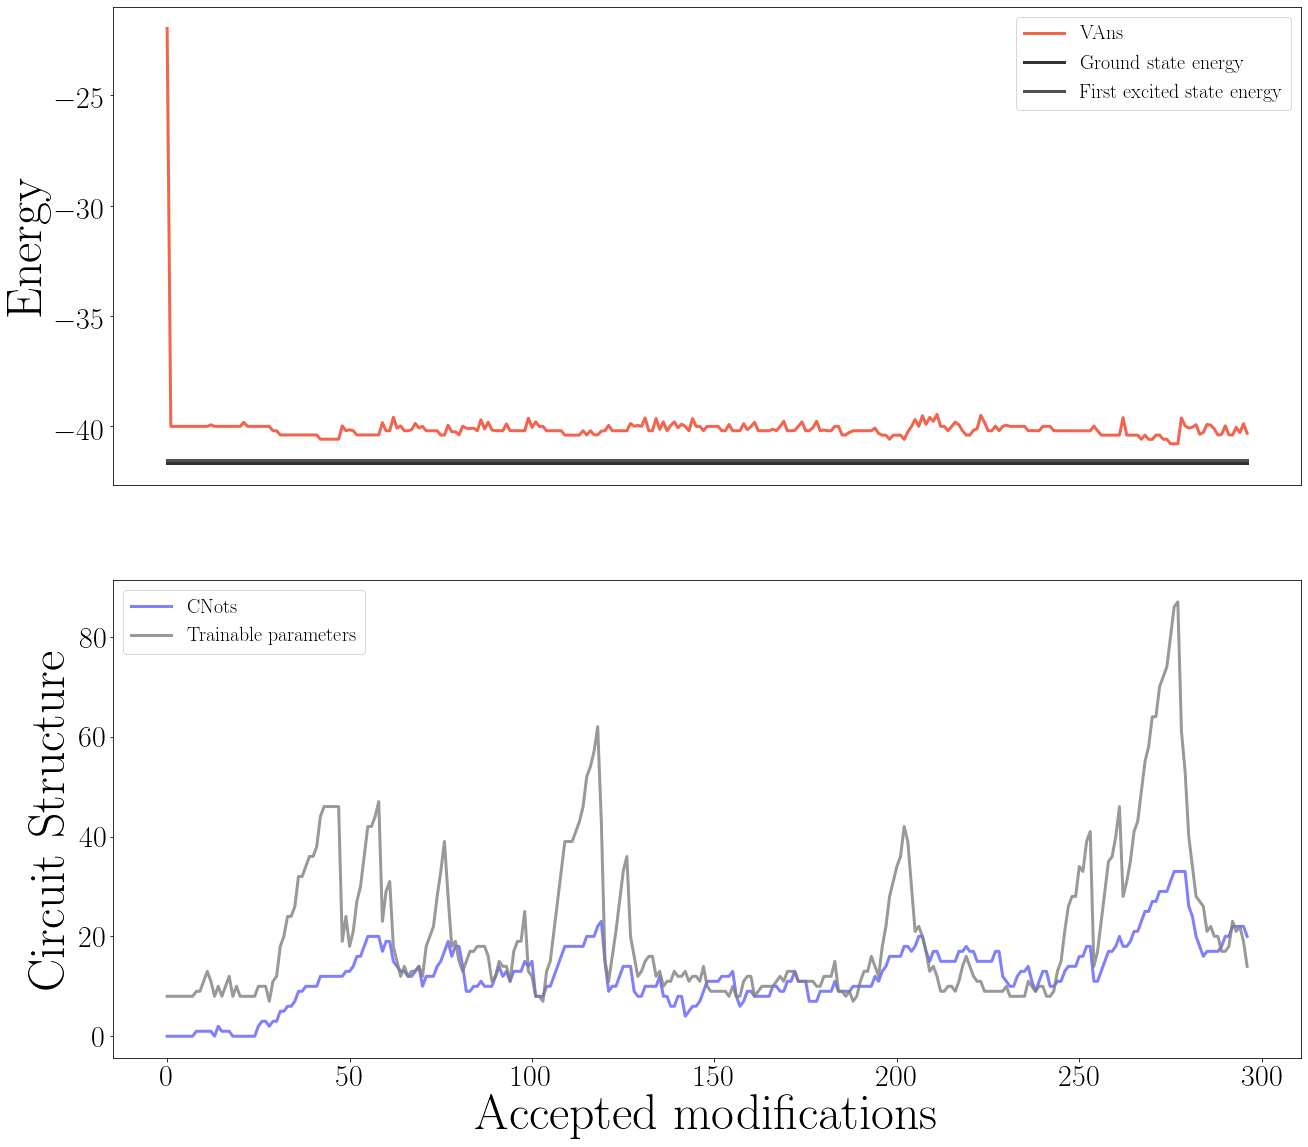

In [35]:
energies = []
J=5.0
args={"n_qubits":8,"problem_config":{"problem" : "XXZ", "g":1.0, "J": J}, "load_displaying":False, "specific_folder_name":"8Q - J {} g 1.0".format(J)}
vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"])

evaluator = Evaluator(args,loading=True, path="../data-vans/")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"

nparams=[]
cnots=[]
energies=[]
for index in range(len(list(evaluator.evolution.keys()))):
    index_circuit=evaluator.evolution[index][2]
    cnots.append(vqe_handler.count_cnots(index_circuit))
    nparams.append(vqe_handler.count_params(index_circuit))
    energies.append(evaluator.evolution[index][1])
    
plt.figure(figsize=(20,20))
ax2 = plt.subplot2grid((2,1),(0,0))
ax1 = plt.subplot2grid((2,1),(1,0))

plt.subplots_adjust(bottom=0.15,left=0.075)

ax1.plot(cnots, label="CNots", color="blue",linewidth=3, alpha=0.5)
ax1.plot(nparams, label="Trainable parameters", color="grey",linewidth=3, alpha=0.8)
ax1.legend(prop={"size":20},loc=0)
ax1.set_xlabel("Accepted modifications")
ax1.set_ylabel("Circuit Structure")
ax2.plot(energies, alpha=0.8,  linewidth=3,color=converter.to_rgb(color3), label="VAns")
ax2.plot(np.ones(len(energies))*compute_ground_energy_1(vqe_handler.observable,vqe_handler.qubits)[0], 
         color="black",alpha=0.8,  linewidth=3, label="Ground state energy")
ax2.plot(np.ones(len(energies))*compute_ground_energy_1(vqe_handler.observable,vqe_handler.qubits)[1], 
         color=converter.to_rgb("#23272a"),alpha=0.8,  linewidth=3, label="First excited state energy")

ax2.legend(prop={"size":20},loc=1)
ax2.xaxis.set_visible(False)
ax2.set_ylabel("Energy")

plt.savefig("evolution_circuit_xxz.png")

In [8]:
args={"n_qubits":8,"problem_config":{"problem" : "XXZ", "g":1.0, "J": 2.0}, "load_displaying":False, "specific_folder_name":"8Q - J {} g 1.0".format(2.0)}
vqe_handler1 = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"], optimizer="sgd", lr=0.005)

evaluator = Evaluator(args,loading=True, path="../data-vans/")

cnotsenergy1=[]
indices_cnot1=[]
for ind, val in enumerate(tqdm(cnots[:50])):
    if val>3:
        indexed_circuit = vqe_handler1.create_hea_w_cnots(val)
        cnotsenergy1.append(vqe_handler1.vqe(index_circuit)[0])
        indices_cnot1.append(ind)

100%|██████████| 50/50 [01:52<00:00,  2.24s/it]


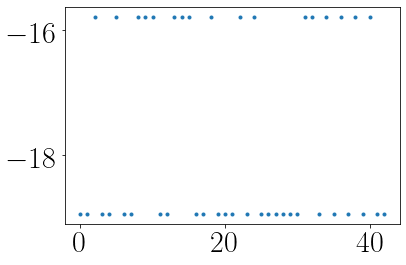

In [12]:
plt.plot(cnotsenergy1,'.')

In [11]:
cnots

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 6,
 7,
 8,
 10,
 12,
 10,
 10,
 10,
 12,
 13,
 15,
 17,
 17,
 17,
 17,
 19,
 19,
 20,
 22,
 22,
 24,
 22,
 20,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 20,
 18,
 18,
 18,
 20,
 20,
 22,
 24,
 26,
 26,
 24,
 20,
 22,
 18,
 20,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 18,
 20,
 20,
 18,
 20,
 20,
 18,
 20,
 18,
 20,
 22,
 22,
 22,
 24,
 25,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 28,
 26,
 28,
 28,
 28,
 30,
 32,
 34,
 34,
 34,
 36,
 36,
 36,
 34,
 32,
 34,
 31,
 27,
 28,
 28,
 28,
 28,
 30,
 32,
 33,
 31,
 31,
 31,
 29,
 29,
 31,
 31,
 33,
 31,
 31,
 31,
 33,
 33,
 31,
 23,
 23,
 25,
 27,
 27,
 27,
 23,
 21,
 21,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 25,
 27,
 27,
 27,
 29,
 29,
 29,
 29,
 31,
 31,
 31,
 33,
 33,
 33,
 31,
 33,
 35,
 33,
 33,
 35,
 37,
 37,
 37,
 39,
 39,
 39,
 39,
 33,
 31,
 33,
 35,
 33,
 35,
 35,
 36,
 38,
 40,
 40,
 42,
 40,
 40,
 42,
 42,
 38,
 38,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 33,
 31,
 31,
 33,
 33,
 35,
 35,
 3

In [202]:
cnotsenergy=[]
indices_cnot=[]
for ind, val in enumerate(tqdm(cnots)):
    if val>3:
        indexed_circuit = vqe_handler.create_hea_w_cnots(val)
        cnotsenergy.append(vqe_handler.vqe(index_circuit)[0])
        indices_cnot.append(ind)

100%|██████████| 479/479 [36:54<00:00,  4.62s/it]


In [203]:
paramssenergy=[]
indices_params=[]
for ind, val in enumerate(tqdm(nparams)):
    try:
        indexed_circuit = vqe_handler.create_hea_w_params(val)
        paramssenergy.append(vqe_handler.vqe(index_circuit)[0])
        indices_params.append(ind)
    except Exception as e: #there's a chance that circuit becomse to shallow (i don't think so though)
        print(e)

100%|██████████| 479/479 [43:10<00:00,  5.41s/it]


In [204]:
os.makedirs("results/hea/data_comparison/",exist_ok=True)
np.save("results/hea/data_comparison/cnotsenergy",cnotsenergy)
np.save("results/hea/data_comparison/indices_cnot",indices_cnot)
np.save("results/hea/data_comparison/paramssenergy",paramssenergy)
np.save("results/hea/data_comparison/indices_params",indices_params)

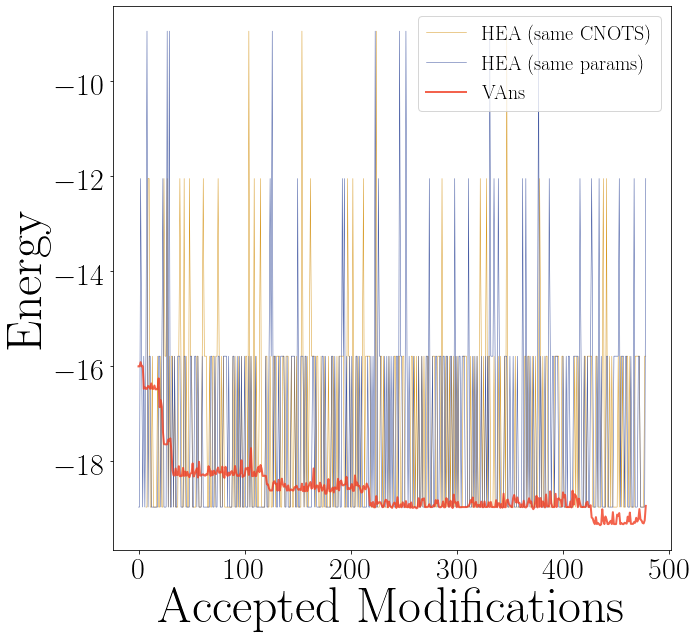

In [212]:
plt.figure(figsize=(10,10))

converter = colors.ColorConverter()

color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"


plt.plot(indices_cnot,cnotsenergy[:len(indices_cnot)],linewidth=0.5, alpha=1,color=converter.to_rgb(color1), label="HEA (same CNOTS)")
plt.plot(indices_params,paramssenergy,linewidth=0.5, alpha=1,color=converter.to_rgb(color2), label="HEA (same params)")
plt.plot(energies, linewidth=2, alpha=0.8, color=converter.to_rgb(color3),label="VAns")
plt.legend(prop={"size":20}, loc=1)
plt.xlabel("Accepted Modifications")
plt.ylabel("Energy")
plt.savefig("results/hea/ansatz_comparison_energy.pdf",format="pdf")

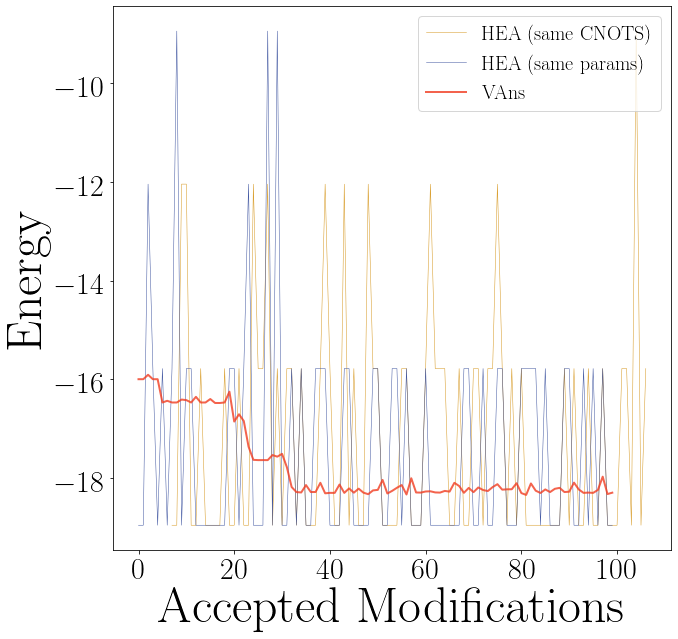

In [215]:
plt.figure(figsize=(10,10))

converter = colors.ColorConverter()

color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"

ind1=0
ind2=100

plt.plot(indices_cnot[ind1:ind2],cnotsenergy[:len(indices_cnot)][ind1:ind2],linewidth=0.5, alpha=1,color=converter.to_rgb(color1), label="HEA (same CNOTS)")
plt.plot(indices_params[ind1:ind2],paramssenergy[ind1:ind2],linewidth=0.5, alpha=1,color=converter.to_rgb(color2), label="HEA (same params)")
plt.plot(energies[ind1:ind2], linewidth=2, alpha=0.8, color=converter.to_rgb(color3),label="VAns")
plt.legend(prop={"size":20}, loc=1)
plt.xlabel("Accepted Modifications")
plt.ylabel("Energy")
plt.savefig("ansatz_comparison_energy100.pdf",format="pdf")

In [ ]:


# ####### TWO AXIS ####
# energies = np.load("results/TFIM/plot/energiesTFIM8.npy")
# plt.figure(figsize=(20,20))
# ax1 = plt.subplot2grid((2,1),(0,0))
# ax2 = plt.subplot2grid((2,1),(1,0))
#
# plt.suptitle("8 qubits\n"+r'$H = -g \sum_j \sigma_j^{z} - J \sum_j \sigma_{j}^{x} \sigma_{j+1}^{x}$')
# ax1.plot(js, ans, color="blue",alpha=0.7,label="Ground state energy")
# ax1.scatter(js,energies, s=300, alpha=1.0, color="red", label="VAns" )
# ax2.scatter(js,np.abs((energies-ans)/ans), s=300, color="red")
# ax2.set_ylabel(r'$\frac{\Delta E}{E_g}$')
# ax2.set_xlabel("J")
#
# ax1.legend(prop={"size":40})
# plt.savefig("results/TFIM/plot/tfim8",format="pdf")



####### SINGLE AXIS ####
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


converter = colors.ColorConverter()


color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"



plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,1),(0,0))
plt.subplots_adjust(bottom=0.15,left=0.075)
plt.suptitle(r'$H = -g \sum_j \sigma_j^{z} - J \sum_j \sigma_{j}^{x} \sigma_{j+1}^{x}$',size=60)
ax1.plot(js, ans,color=converter.to_rgb(color1),alpha=0.7,label=r'$E_{ground}$')
ax1.scatter(js,energies, s=400, alpha=1.0, color=converter.to_rgb(color2), label="VAns" )
# ax1.scatter(js[0:1],energies[0:1], s=300, color="purple",alpha=1, label=r'$\frac{\Delta E}{E_ground}$')

ax1.set_xlabel("J",size=70)
ax1.set_yticks([np.round(k,0) for k in np.linspace(np.min(energies), np.max(energies), 4)])
ax1.tick_params(direction='out', length=6, width=2, colors='black', grid_alpha=0.5,labelsize=40)


axins = inset_axes(ax1, width="50%", height="40%", loc=3,borderpad=3)
axins.scatter(js,relatives, s=300, color=converter.to_rgb(color3), alpha=0.7, label=r'$\frac{\Delta E}{E_{ground}}$')
axins.xaxis.set_visible(False)

axins.set_yticks([np.round(k,2) for k in np.linspace(np.min(relatives), np.max(relatives), 4)])
axins.yaxis.tick_right()
axins.tick_params(direction='out', length=3, width=1, colors='black',grid_color='r', grid_alpha=0.5,labelsize=40)
# axins.set_yticks([], minor=True)
# labs = [l.get_label() for l in [ax1,axins]]

# ff=p0+p1+p2
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = axins.get_legend_handles_labels()

ax1.legend(lines+lines2, labels+labels2, prop={"size":40})
plt.savefig("results/TFIM/plot/tfim8qbits.pdf",format="pdf")






#
